#### Select a dataset from the UCI Machine Learning Repository that are classified for the task of Regression.
Datasets can be found at the following link: (https://archive.ics.uci.edu/ml/datasets.php)

#### Chosen Dataset: Real estate valuation data set Data Set
https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('./real_estate_valuation.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


#### Attribute Information:

##### The inputs are as follows
X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
    
    Ex: 000-099 (Jan) 100-199 (Feb)...etc

X2=the house age (unit: year)

X3=the distance to the nearest MRT station (unit: meter)

X4=the number of convenience stores in the living circle on foot (integer)

X5=the geographic coordinate, latitude. (unit: degree)

X6=the geographic coordinate, longitude. (unit: degree)

##### The output is as follow
Y = house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

In [3]:
# Drop column labeled 'No'
df=df.drop(['No'],axis=1)

In [4]:
# Rename columns to something more meaningful
df=df.rename(columns={"X1 transaction date": "Transaction Date", "X2 house age": "Age of Home",\
                     "X3 distance to the nearest MRT station": "Closest Metro (meters)", "X4 number of convenience stores": "Convenience Stores",\
                     "X5 latitude":"Latitude","X6 longitude":"Longitude","Y house price of unit area":"Price Per Ping"})
df.head()

,Transaction Date,Age of Home,Closest Metro (meters),Convenience Stores,Latitude,Longitude,Price Per Ping
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
# Extract date in cleaner format
dates=[]
for i in df['Transaction Date']:
    month_day, year=math.modf(i)
    year=int(year)
    month=int(month_day*10)+1
    date=str(month)+"-"+str(year)
    dates.append(date)

In [6]:
# Create dataframe from dates array
new_df=pd.DataFrame({'Transaction Date': dates})

# Overwrite original dataframe with fixed values
df.update(new_df)
df.head()

,Transaction Date,Age of Home,Closest Metro (meters),Convenience Stores,Latitude,Longitude,Price Per Ping
0,10-2012,32.0,84.87882,10,24.98298,121.54024,37.9
1,10-2012,19.5,306.59470,9,24.98034,121.53951,42.2
2,6-2013,13.3,561.98450,5,24.98746,121.54391,47.3
3,6-2013,13.3,561.98450,5,24.98746,121.54391,54.8
4,9-2012,5.0,390.56840,5,24.97937,121.54245,43.1


In [7]:
df.describe()

,Age of Home,Closest Metro (meters),Convenience Stores,Latitude,Longitude,Price Per Ping
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


#### Exploratory data analysis:  
Explore the dataset in R using visualization and descriptive statistics.
You can use the functions provided in Chapter 3 of the text as an example.
Write a brief report showing your exploratory data analysis.
You should at least show descriptive statistics for the data including visualizations of the distribution 
of the attributes, relationships between attributes.

<AxesSubplot:title={'center':'Age vs Price'}, xlabel='Age of Home', ylabel='Price Per Ping'>

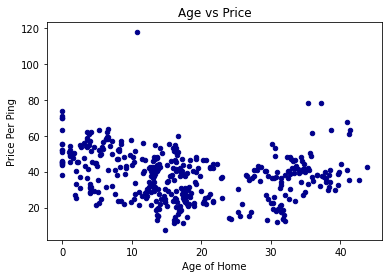

In [8]:
df.plot.scatter(x='Age of Home',
                y='Price Per Ping',
                c='DarkBlue',
                title="Age vs Price")

<AxesSubplot:title={'center':'Date of Sale vs Price'}, xlabel='Transaction Date', ylabel='Price Per Ping'>

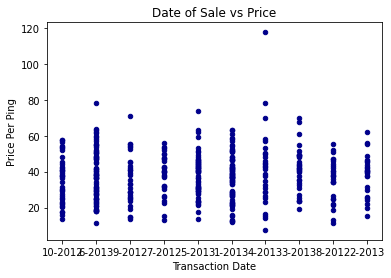

In [9]:
df.plot.scatter(x='Transaction Date',
                y='Price Per Ping',
                c='DarkBlue',
                title="Date of Sale vs Price")

<AxesSubplot:title={'center':'Store Proximity vs Price'}, xlabel='Convenience Stores', ylabel='Price Per Ping'>

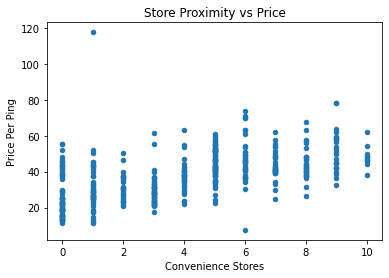

In [10]:
df.plot.scatter(x='Convenience Stores',
                y='Price Per Ping',
                title="Store Proximity vs Price")

<AxesSubplot:title={'center':'Metro Proximity vs Price'}, xlabel='Closest Metro (meters)', ylabel='Price Per Ping'>

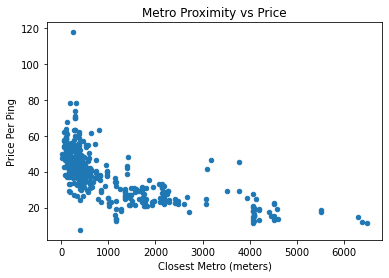

In [11]:
df.plot.scatter(x='Closest Metro (meters)',
                y='Price Per Ping',
                title="Metro Proximity vs Price")

<AxesSubplot:title={'center':'Metro Proximity vs. Store Proximity'}, xlabel='Closest Metro (meters)', ylabel='Convenience Stores'>

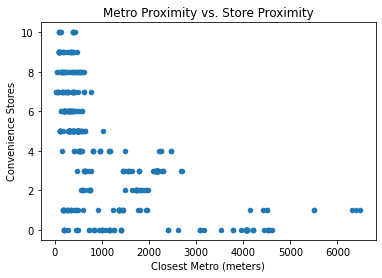

In [12]:
df.plot.scatter(x='Closest Metro (meters)',
                y='Convenience Stores',
                title="Metro Proximity vs. Store Proximity")

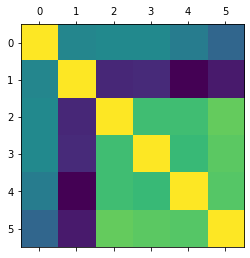

In [13]:
# Display correlation matrix of the dataframe
# Darker squares indicate weaker correlation 
# Lighter squares indicate stronger correlation
plt.matshow(df.corr())

#### Data Preprocessing: 
1. Some of the methods for data reduction require the data to be normalized (i.e. rescaling data measured in differing units). Use R to normalize the numerical attributes of this dataset using min-max normalization, z-scores, and decimal scaling
2. Select a continuous variable and experiment with at least two methods to bin the variable into discrete categories.
3. Find a variable that does not have a normal distribution based on your exploratory data analysis. Use the natural log, square root, and inverse square root transformations to make attempts to achieve normality.

#### Report on your results

#### 1. Transforming and Scaling Data

In [14]:
# Create subframe containing only values we're interested in using
metro_store_price=df[['Closest Metro (meters)','Convenience Stores','Price Per Ping']]
metro_store_price.head()

,Closest Metro (meters),Convenience Stores,Price Per Ping
0,84.87882,10,37.9
1,306.59470,9,42.2
2,561.98450,5,47.3
3,561.98450,5,54.8
4,390.56840,5,43.1


<AxesSubplot:>

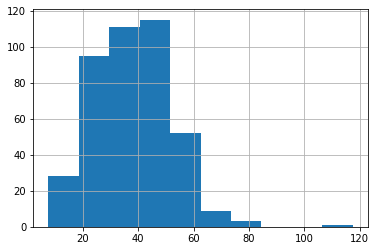

In [15]:
metro_store_price['Price Per Ping'].hist()

In [16]:
# Drop outlier record from entire metro_store_price dataframe
outlier_index = metro_store_price[ metro_store_price['Price Per Ping'] == metro_store_price['Price Per Ping'].max() ].index
metro_store_price.drop(outlier_index, inplace=True)
metro_store_price.describe()

/home/barry/.local/lib/python3.7/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Closest Metro (meters),Convenience Stores,Price Per Ping
count,413.000000,413.000000,413.000000
mean,1085.898530,4.101695,37.787651
std,1262.974876,2.945182,13.046097
min,23.382840,0.000000,7.600000
25%,289.324800,1.000000,27.700000
50%,492.231300,4.000000,38.400000
75%,1455.798000,6.000000,46.600000
max,6488.021000,10.000000,78.300000


<AxesSubplot:>

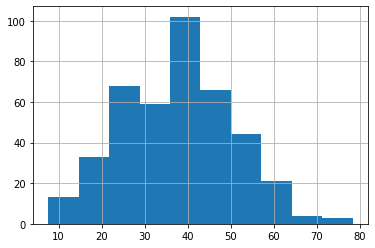

In [17]:
metro_store_price['Price Per Ping'].hist()

<AxesSubplot:>

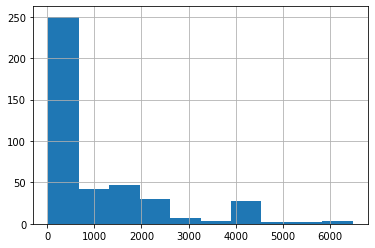

In [18]:
metro_store_price['Closest Metro (meters)'].hist()

<AxesSubplot:>

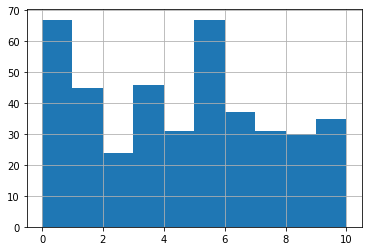

In [19]:
# Raw data
metro_store_price['Convenience Stores'].hist()

(array([ 13.,  33.,  68.,  59., 102.,  66.,  44.,  21.,   4.,   3.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

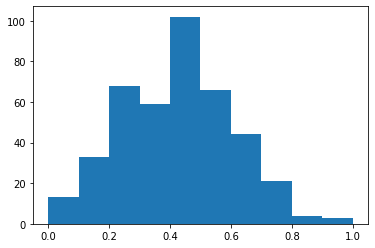

In [20]:
# MinMax Scale
scaler = MinMaxScaler()
scaled_data=scaler.fit(metro_store_price)
output=scaler.transform(metro_store_price)
scaled_stores=output[::,0]
scaled_price=output[::,2]
plt.hist(scaled_price)

#### 2. Binningmetro_store_price['Convenience Stores']

In [21]:
# Convenience store binning
bins=[0,2,5,7,10]
binned_stores=pd.cut(metro_store_price['Convenience Stores'], bins)
binned_stores[1]

# Metro binning
bins=[0,1500,3000,4500,6000,7500]
binned_metro=pd.cut(metro_store_price['Closest Metro (meters)'], bins)
binned_metro

# Price binning
bins=[0,20,40,60,80]
binned_price=pd.cut(metro_store_price['Price Per Ping'], bins)
binned_price

binned_values=pd.DataFrame({'Convenience Stores':binned_stores,
                           'Closest Metro':binned_metro,
                           'Price Per Ping': binned_price})
binned_values.head()

,Convenience Stores,Closest Metro,Price Per Ping
0,"(7, 10]","(0, 1500]","(20, 40]"
1,"(7, 10]","(0, 1500]","(40, 60]"
2,"(2, 5]","(0, 1500]","(40, 60]"
3,"(2, 5]","(0, 1500]","(40, 60]"
4,"(2, 5]","(0, 1500]","(40, 60]"


#### 3. Natural log, Squre root, inverse square root transforms

(array([ 2.,  6., 27., 44., 77., 94., 39., 54., 34., 36.]),
 array([3.15200242, 3.71457346, 4.2771445 , 4.83971554, 5.40228659,
        5.96485763, 6.52742867, 7.08999971, 7.65257075, 8.21514179,
        8.77771283]),
 <BarContainer object of 10 artists>)

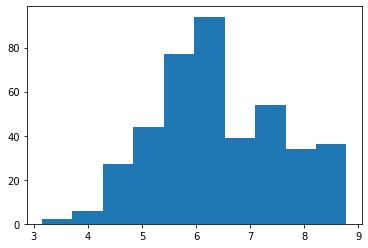

In [22]:
natural_log_metro = np.log(metro_store_price['Closest Metro (meters)'])
plt.hist(natural_log_metro)

#### Regression Analysis:  
Based on your exploratory data analysis of the dataset, come up with a prediction question and create a regression model to predict a dependent variable based on a set of dependent variables. For best results, make sure that the variables that you choose are numeric. If you insist on using a categorical variable, they will have to be converted to numeric variables.

#### Question: 
What is the relationship between convenience stores, metro distance, and home prices? 

Can we use distance from metros and convenience store density to predict home prices?

#### Create Regression Prediction for Price Per Ping for Convenience Stores variable

In [23]:
X=pd.DataFrame(scaled_stores,columns=['Convenience Stores'])
Y=pd.DataFrame(scaled_price,columns=['Price Per Ping'])
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [24]:
print("Coefficient",reg.coef_)
print("Intercept:",reg.intercept_)

Coefficient [[-0.65515373]]
Intercept: [0.53503831]


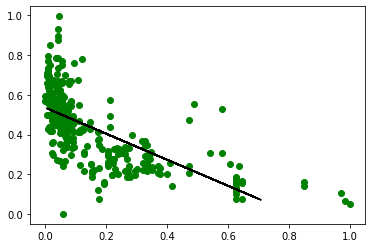

In [25]:
plt.scatter(x_train,y_train,color='g')
plt.plot(x_test, reg.predict(x_test),color='k')
plt.show()

#### Create Regression Prediction for Price Per Ping for Closest Metro variable

In [26]:
X=pd.DataFrame({'Closest Metro':natural_log_metro})
Y=pd.DataFrame({'Price Per Ping':scaled_price})

In [27]:
print("Coefficient",reg.coef_)
print("Intercept:",reg.intercept_)

Coefficient [[-0.65515373]]
Intercept: [0.53503831]


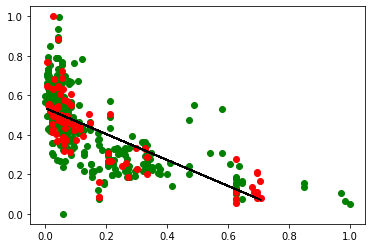

In [28]:
plt.scatter(x_train,y_train,color='g')
plt.plot(x_test, reg.predict(x_test),color='k')
plt.scatter(x_test,y_test,color='r')
plt.show()